In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(0)
sess = tf.InteractiveSession()
mnist = input_data.read_data_sets('../../dataset/MNIST_data/', one_hot=True)

np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

Extracting ../../dataset/MNIST_data/train-images-idx3-ubyte.gz
Extracting ../../dataset/MNIST_data/train-labels-idx1-ubyte.gz
Extracting ../../dataset/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../../dataset/MNIST_data/t10k-labels-idx1-ubyte.gz


In [2]:
# https://en.wikipedia.org/wiki/Kernel_(image_processing)

k0 = np.ones([3, 3], np.float32) / 9
print(k0)

[[ 0.111  0.111  0.111]
 [ 0.111  0.111  0.111]
 [ 0.111  0.111  0.111]]


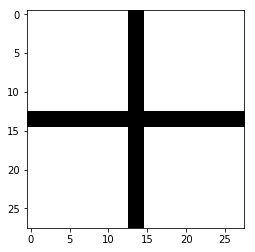

In [3]:
image = np.zeros([28, 28], np.float32)
image[13:15], image[:, 13:15] = 1.0, 1.0

plt.imshow(image, cmap='Greys')
plt.show()

In [4]:
# https://www.tensorflow.org/api_docs/python/tf/nn/conv2d
# tf.nn.conv2d(
#     input,
#     filter,
#     strides,
#     padding,
#     use_cudnn_on_gpu=None,
#     data_format=None,
#     name=None
# )

image = np.zeros([28, 28], np.float32)
image[13:15], image[:, 13:15] = 1.0, 1.0
k0 = np.ones([3, 3], np.float32) / 9

image = image.reshape(1, 28, 28, 1) # image = np.reshape(image, [1, 28, 28, 1])
k0 = k0.reshape(3, 3, 1, 1)

conv = tf.nn.conv2d(image, k0, [1, 1, 1, 1], 'VALID').eval()
print(conv.shape)

# plt.imshow(conv.reshape(26, 26), cmap='Greys')
# plt.show()

(1, 26, 26, 1)


In [5]:
image = np.zeros([28, 28], np.float32)
image[13:15], image[:, 13:15] = 1.0, 1.0
k0 = np.ones([3, 3], np.float32) / 9

image = image.reshape(1, 28, 28, 1)
k0 = k0.reshape(3, 3, 1, 1)

conv = tf.nn.conv2d(image, k0, [1, 1, 1, 1], 'SAME').eval()
print(conv.shape)

# plt.imshow(conv.reshape(28, 28), cmap='Greys')
# plt.show()

(1, 28, 28, 1)


In [6]:
image = np.zeros([28, 28], np.float32)
image[13:15], image[:, 13:15] = 1.0, 1.0
k0 = np.ones([3, 3], np.float32) / 9

image = image.reshape(1, 28, 28, 1)
k0 = k0.reshape(3, 3, 1, 1)

conv = tf.nn.conv2d(image, k0, [1, 2, 2, 1], 'SAME').eval()
print(conv.shape)

# plt.imshow(conv.reshape(14, 14), cmap='Greys')
# plt.show()

(1, 14, 14, 1)


In [7]:
# https://en.wikipedia.org/wiki/Sobel_operator

image = np.zeros([28, 28], np.float32)
image[13:15], image[:, 13:15] = 1.0, 1.0
k1 = np.array([[1, 0, -1],
               [2, 0, -2],
               [1, 0, -1]], np.float32)

image = image.reshape(1, 28, 28, 1)
k1 = k1.reshape(3, 3, 1, 1)

conv = tf.nn.conv2d(image, k1, [1, 1, 1, 1], 'SAME').eval()
print(conv.shape)

# plt.imshow(conv.reshape(28, 28), cmap='Greys')
# plt.show()

(1, 28, 28, 1)


In [8]:
# https://en.wikipedia.org/wiki/Sobel_operator

image = np.zeros([28, 28], np.float32)
image[13:15], image[:, 13:15] = 1.0, 1.0
k2 = np.array([[1, 2, 1],
               [0, 0, 0],
               [-1, -2, -1]], np.float32)

image = image.reshape(1, 28, 28, 1)
k2 = k2.reshape(3, 3, 1, 1)

conv = tf.nn.conv2d(image, k2, [1, 1, 1, 1], 'SAME').eval()
print(conv.shape)

# plt.imshow(conv.reshape(28, 28), cmap='Greys')
# plt.show()

(1, 28, 28, 1)


In [9]:
k0 = np.ones([3, 3], np.float32) / 9
k1 = np.array([[1, 0, -1],
               [2, 0, -2],
               [1, 0, -1]], np.float32)
k2 = np.array([[1, 2, 1],
               [0, 0, 0],
               [-1, -2, -1]], np.float32)

kernels = np.dstack((k0, k1, k2))
print(kernels)
print(kernels.shape)

[[[ 0.111  1.     1.   ]
  [ 0.111  0.     2.   ]
  [ 0.111 -1.     1.   ]]

 [[ 0.111  2.     0.   ]
  [ 0.111  0.     0.   ]
  [ 0.111 -2.     0.   ]]

 [[ 0.111  1.    -1.   ]
  [ 0.111  0.    -2.   ]
  [ 0.111 -1.    -1.   ]]]
(3, 3, 3)


In [10]:
image = np.zeros([28, 28], np.float32)
image[13:15], image[:, 13:15] = 1.0, 1.0

k0 = np.ones([3, 3], np.float32) / 9
k1 = np.array([[1, 0, -1],
               [2, 0, -2],
               [1, 0, -1]], np.float32)
k2 = np.array([[1, 2, 1],
               [0, 0, 0],
               [-1, -2, -1]], np.float32)
kernels = np.dstack((k0, k1, k2))

image = image.reshape(1, 28, 28, 1)
kernels = kernels.reshape(3, 3, 1, 3)

conv = tf.nn.conv2d(image, kernels, [1, 1, 1, 1], 'SAME').eval()
print(conv.shape)

# for i in range(3):
#     plt.imshow(conv[..., [i]].reshape(28, 28), cmap='Greys')
#     plt.show()

(1, 28, 28, 3)


(1, 28, 28, 3)


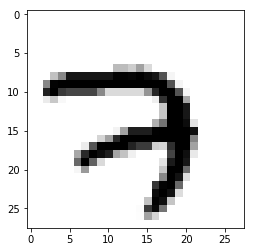

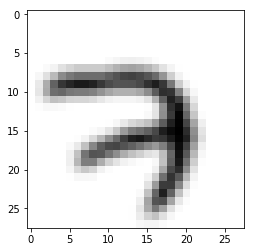

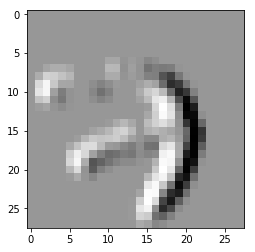

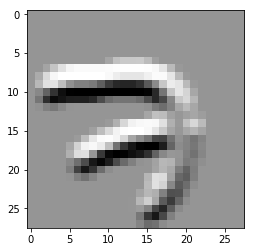

In [11]:
image = mnist.train.images[0]

k0 = np.ones([3, 3], np.float32) / 9
k1 = np.array([[1, 0, -1],
               [2, 0, -2],
               [1, 0, -1]], np.float32)
k2 = np.array([[1, 2, 1],
               [0, 0, 0],
               [-1, -2, -1]], np.float32)
kernels = np.dstack((k0, k1, k2))

image = image.reshape(1, 28, 28, 1)
kernels = kernels.reshape(3, 3, 1, 3)

conv = tf.nn.conv2d(image, kernels, [1, 1, 1, 1], 'SAME').eval()
print(conv.shape)

plt.imshow(image.reshape(28, 28), cmap='Greys')
plt.show()
for i in range(3):
    plt.imshow(conv[..., [i]].reshape(28, 28), cmap='Greys')
    plt.show()

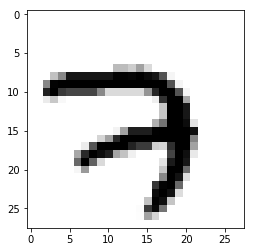

(1, 14, 14, 1)


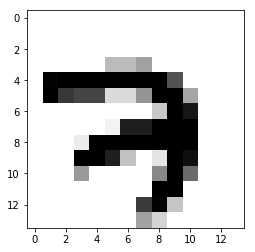

In [12]:
# https://www.tensorflow.org/api_docs/python/tf/nn/max_pool
# tf.nn.max_pool(
#     value,
#     ksize,
#     strides,
#     padding,
#     data_format='NHWC',
#     name=None
# )
# [batch, height, width, channels]

image = mnist.train.images[0]
plt.imshow(image.reshape(28, 28), cmap='Greys')
plt.show()

image = image.reshape(1, 28, 28, 1)

pool = tf.nn.max_pool(image, [1, 2, 2, 1], [1, 2, 2, 1], 'SAME').eval()
print(pool.shape)

plt.imshow(pool.reshape(14, 14), cmap='Greys')
plt.show()

(1, 14, 14, 3)


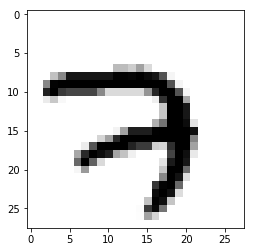

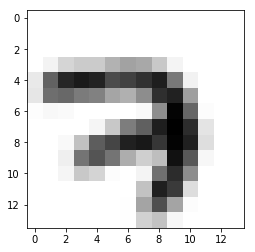

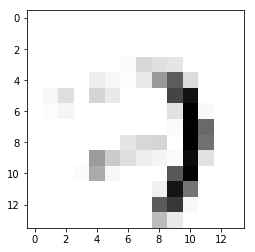

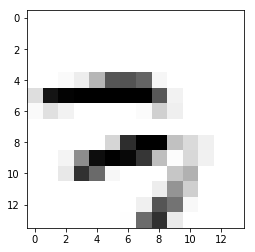

In [13]:
image = mnist.train.images[0]

k0 = np.ones([3, 3], np.float32) / 9
k1 = np.array([[1, 0, -1],
               [2, 0, -2],
               [1, 0, -1]], np.float32)
k2 = np.array([[1, 2, 1],
               [0, 0, 0],
               [-1, -2, -1]], np.float32)
kernels = np.dstack((k0, k1, k2))

image = image.reshape(1, 28, 28, 1)
kernels = kernels.reshape(3, 3, 1, 3)

L1 = tf.nn.conv2d(image, kernels, [1, 1, 1, 1], 'SAME')
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, [1, 2, 2, 1], [1, 2, 2, 1], 'SAME')
L1 = tf.nn.dropout(L1, keep_prob=1.)

conv = L1.eval()
print(conv.shape)

plt.imshow(image.reshape(28, 28), cmap='Greys')
plt.show()
for i in range(3):
    plt.imshow(conv[..., [i]].reshape(14, 14), cmap='Greys')
    plt.show()

In [14]:
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])
keep_prob = tf.placeholder_with_default(1.0, None)

init_w = tf.contrib.layers.xavier_initializer()
init_b = tf.zeros_initializer()

conv_W1 = tf.get_variable('conv_W1', [3, 3, 1, 32], initializer=init_w)
conv_W2 = tf.get_variable('conv_W2', [3, 3, 32, 64], initializer=init_w)

X_img = tf.reshape(X, [-1, 28, 28, 1])

L1 = tf.nn.conv2d(X_img, conv_W1, [1, 1, 1, 1], 'SAME')
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, [1, 2, 2, 1], [1, 2, 2, 1], 'SAME')
L1 = tf.nn.dropout(L1, keep_prob=keep_prob)

L2 = tf.nn.conv2d(L1, conv_W2, [1, 1, 1, 1], 'SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, [1, 2, 2, 1], [1, 2, 2, 1], 'SAME')
L2 = tf.nn.dropout(L2, keep_prob=keep_prob)

In [15]:
print('L1:', L1)
print('L2:', L2)

L1: Tensor("dropout_1/mul:0", shape=(?, 14, 14, 32), dtype=float32)
L2: Tensor("dropout_2/mul:0", shape=(?, 7, 7, 64), dtype=float32)


In [16]:
sess.run(tf.global_variables_initializer())

image = mnist.train.images[[0]]

l1, l2 = sess.run([L1, L2], {X: image})

print('L1:', l1.shape)
print('L2:', l2.shape)

# gs = gridspec.GridSpec(4, 8)
# ax = [plt.subplot(gs[i]) for i in range(32)]
# for i in range(32): ax[i].imshow(l1[..., [i]].reshape(14, 14), cmap='Greys')
# plt.show()
# gs = gridspec.GridSpec(8, 8)
# ax = [plt.subplot(gs[i]) for i in range(64)]
# for i in range(64): ax[i].imshow(l2[..., [i]].reshape(7, 7), cmap='Greys')
# plt.show()

L1: (1, 14, 14, 32)
L2: (1, 7, 7, 64)


In [17]:
L2 = tf.reshape(L2, [-1, 7*7*64])

fc_W1 = tf.get_variable('fc_W1', [7*7*64, 10], initializer=init_w)
fc_b1 = tf.get_variable('fc_b1', [10], initializer=init_b)

logits = tf.matmul(L2, fc_W1) + fc_b1

prediction = tf.argmax(logits, 1)
accuracy = tf.reduce_mean(tf.cast(tf.equal(prediction, tf.argmax(Y, 1)), tf.float32))

In [18]:
sess.run(tf.global_variables_initializer())

x_batch = mnist.train.images[:10]
y_batch = mnist.train.labels[:10]

print(logits.eval({X: x_batch}))
print(prediction.eval({X: x_batch}))
print(accuracy.eval({X: x_batch, Y: y_batch}))

[[-0.007  0.115 -0.109 -0.046 -0.166  0.052 -0.057  0.025  0.271  0.131]
 [-0.01   0.093 -0.054  0.102 -0.028 -0.085  0.029 -0.014  0.13   0.047]
 [-0.008  0.109 -0.066 -0.046  0.04  -0.013  0.022  0.031  0.118  0.058]
 [ 0.002  0.158 -0.015 -0.02  -0.002  0.037  0.035  0.087  0.102  0.038]
 [ 0.041  0.1    0.034 -0.02  -0.065  0.017  0.013  0.044  0.045 -0.069]
 [ 0.048  0.235 -0.048  0.083 -0.086 -0.089  0.002  0.08   0.11   0.075]
 [ 0.094  0.117  0.042  0.007 -0.064  0.022  0.047  0.056  0.097 -0.026]
 [-0.046  0.171 -0.094  0.098 -0.058 -0.062 -0.011  0.145  0.073  0.008]
 [-0.004  0.067 -0.077 -0.02  -0.037 -0.012 -0.     0.06   0.137  0.128]
 [-0.02   0.201 -0.082  0.074 -0.124 -0.043  0.048  0.08   0.175  0.079]]
[8 8 8 1 1 1 1 1 8 1]
0.2
